In [1]:
import numpy as np                    #xử lý mảng, ma trận
import matplotlib.pyplot as plt       #công cụ vẽ đồ thị
import seaborn as sns                 #vẽ đẹp đồ thị
import sklearn                        #các mô hình máy học cơ bản + các dataset nổi tiếng
import pandas as pd                   #xử lý các bảng số liệu

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# design matrix
X = iris.data

In [ ]:
# targets
y = iris.target

In [ ]:
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['label'] = pd.Series(iris.target_names[y], dtype='category')

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

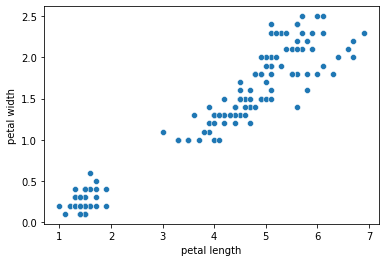

In [ ]:
sns.scatterplot(data=df, x='petal length', y='petal width')

In [ ]:
palette = {'setosa': 'orange', 'versicolor': 'green', 'virginica': 'purple'}

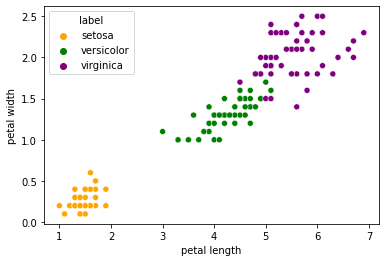

In [ ]:
sns.scatterplot(data=df, x='petal length', y='petal width', hue='label', palette=palette)

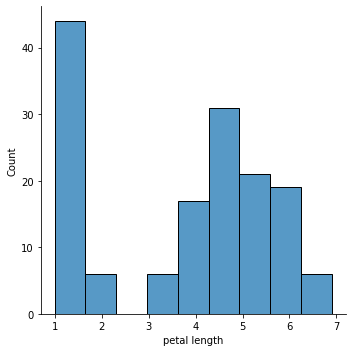

In [ ]:
sns.displot(data=df, x='petal length')

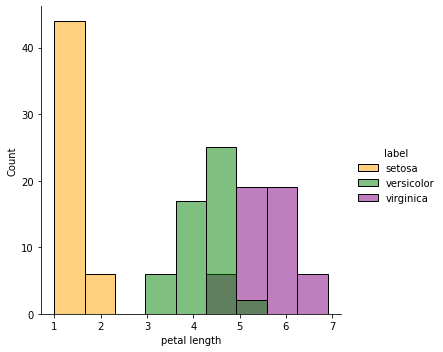

In [ ]:
sns.displot(data=df, x='petal length', hue='label', palette=palette)

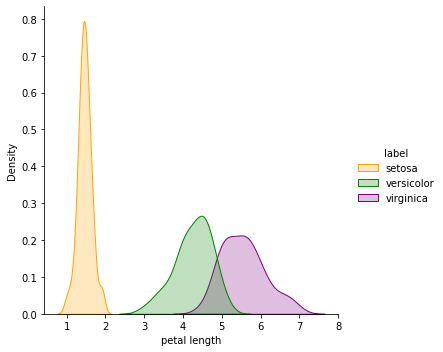

In [ ]:
sns.displot(data=df, x='petal length', hue='label', palette=palette, kind='kde', fill=True)

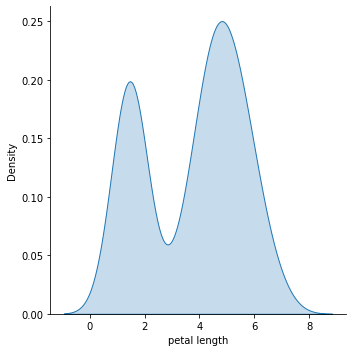

In [ ]:
sns.displot(data=df, x='petal length', palette=palette, kind='kde', fill=True)

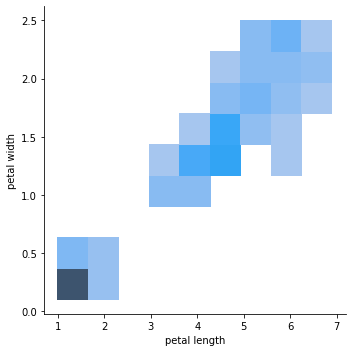

In [ ]:
sns.displot(data=df, x='petal length', y='petal width')

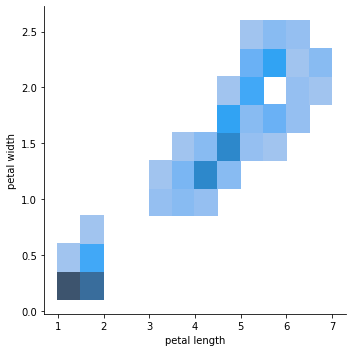

In [ ]:
sns.displot(data=df, x='petal length', y='petal width', binwidth=(0.5, 0.25))

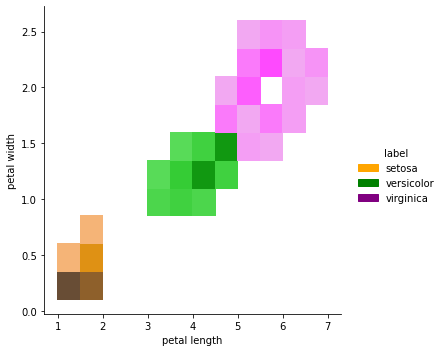

In [ ]:
sns.displot(data=df, x='petal length', y='petal width', binwidth=(0.5, 0.25), hue='label', palette=palette)

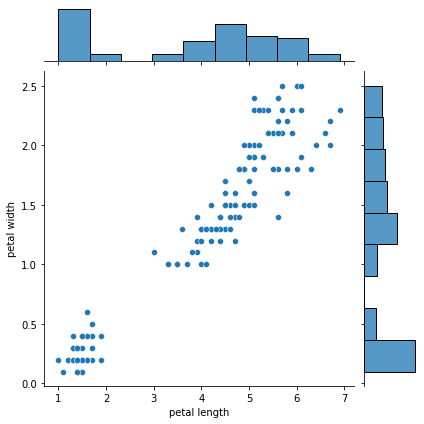

In [ ]:
sns.jointplot(data=df, x='petal length', y='petal width')

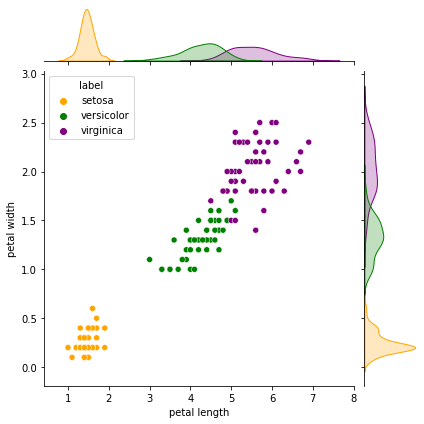

In [ ]:
sns.jointplot(data=df, x='petal length', y='petal width', hue='label', palette=palette)

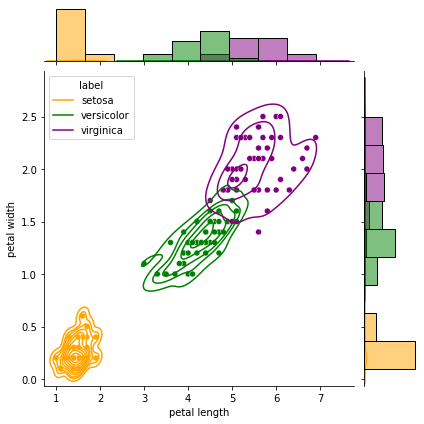

In [ ]:
g = sns.jointplot(data=df, x='petal length', y='petal width', hue='label', palette=palette)
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

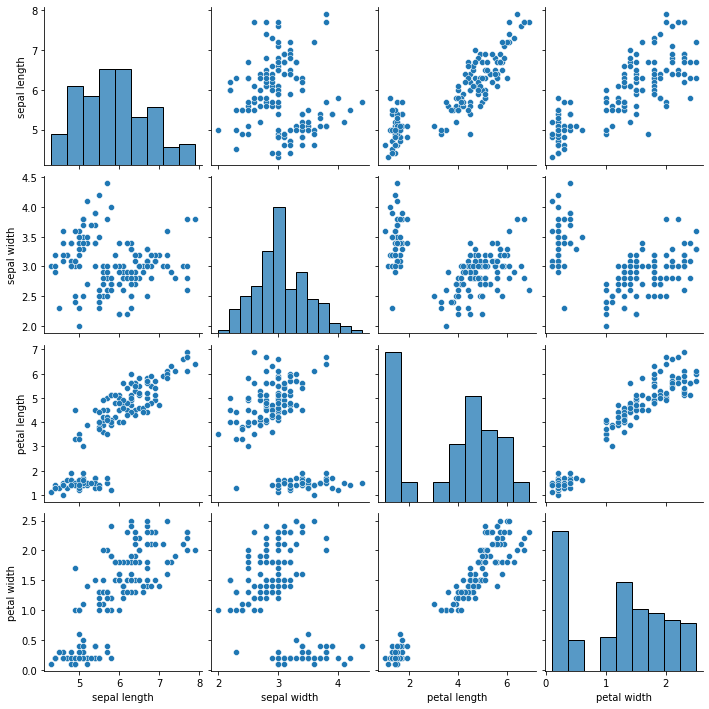

In [ ]:
sns.pairplot(data=df, vars=df.columns[0:4])

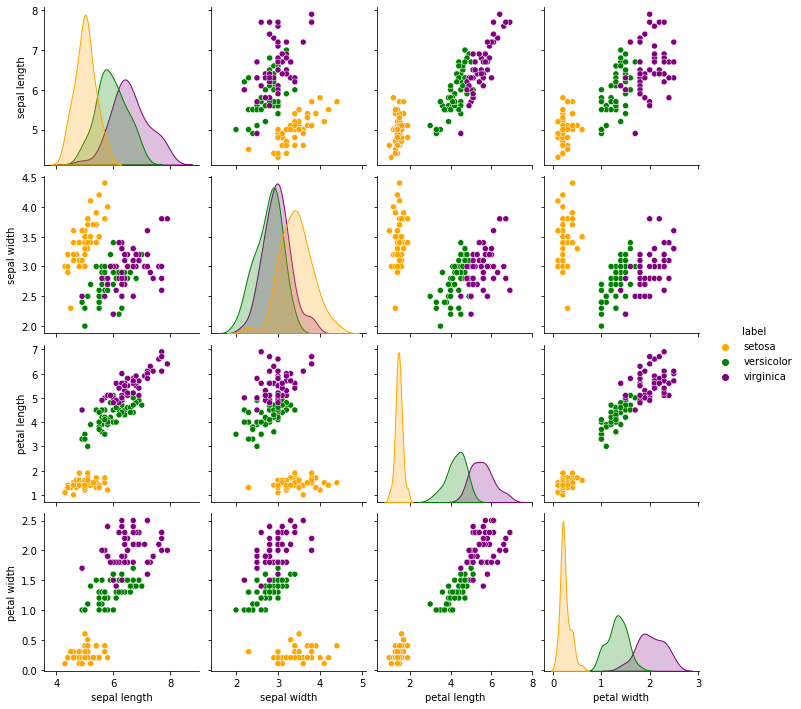

In [ ]:
sns.pairplot(data=df, vars=df.columns[0:4], hue='label', palette=palette)
plt.savefig('iris.pdf')

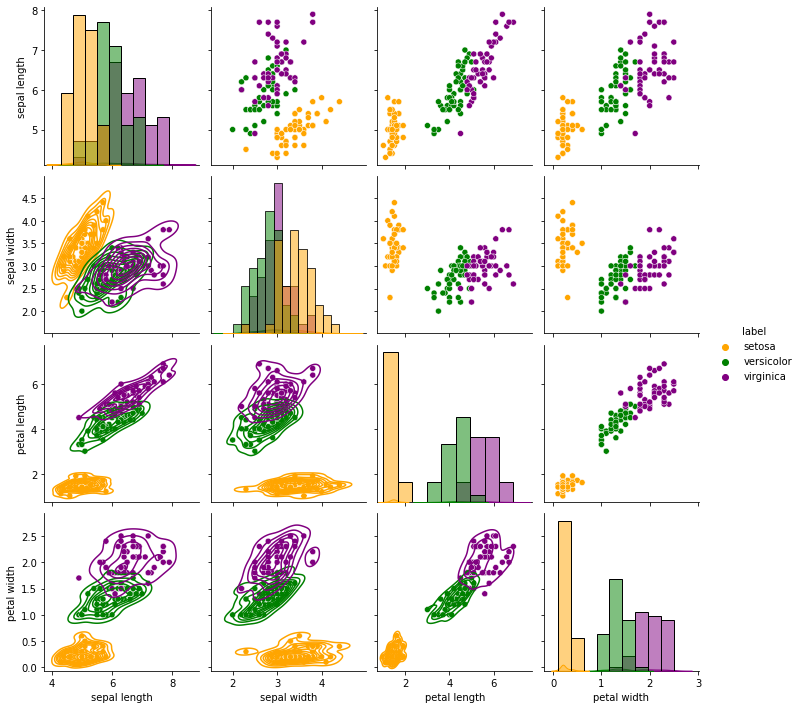

In [ ]:
g = sns.pairplot(data=df, vars=df.columns[0:4], hue='label', palette=palette)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

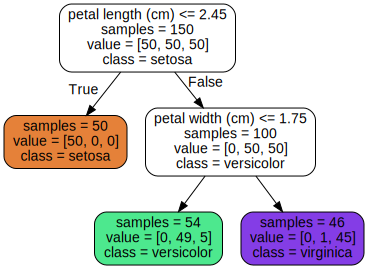

In [ ]:
export_graphviz(model, out_file='iris.dot', feature_names=iris.feature_names, class_names=iris.target_names, impurity=False,
                filled=True, rounded=True)
Source.from_file('iris.dot')

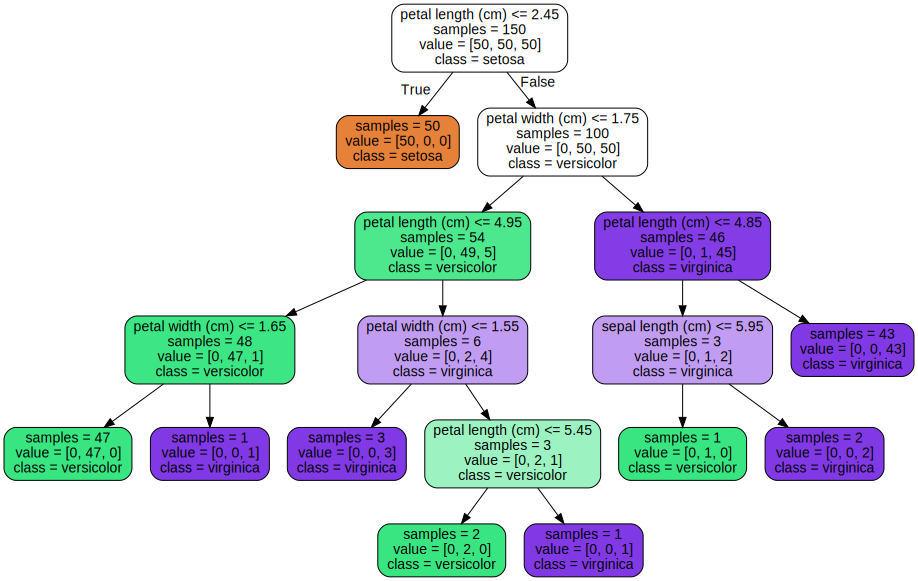

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)
export_graphviz(model, out_file='iris.dot', feature_names=iris.feature_names, class_names=iris.target_names, impurity=False,
                filled=True, rounded=True)
Source.from_file('iris.dot')

In [2]:
penguins = sns.load_dataset('penguins')

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
df = pd.DataFrame(data=penguins)
df.columns = ['species','island','bill length','bill depth', 'flipper length', 'body mass', 'sex']
df

,species,island,bill length,bill depth,flipper length,body mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
palette = {'Adelie': 'orange', 'Gentoo': 'green', 'Chinstrap': 'purple'}

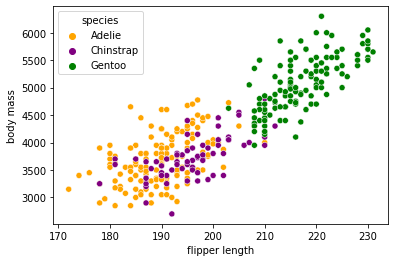

In [ ]:
sns.scatterplot(data=df, x='flipper length', y='body mass', hue='species', palette=palette)

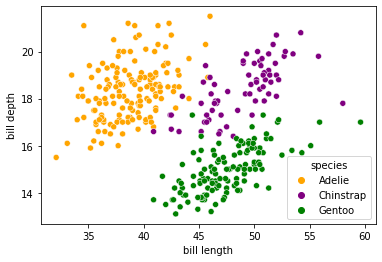

In [ ]:
sns.scatterplot(data=df, x='bill length', y='bill depth', hue='species', palette=palette)

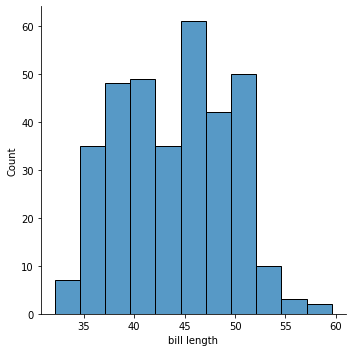

In [ ]:
sns.displot(data=df, x='bill length')

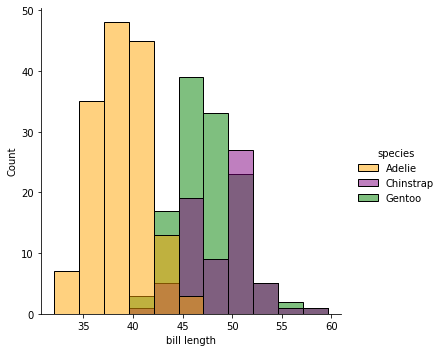

In [ ]:
sns.displot(data=df, x='bill length', hue='species', palette=palette)

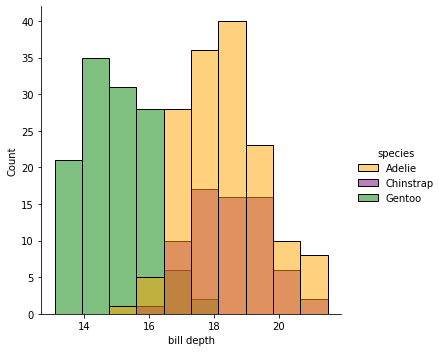

In [ ]:
sns.displot(data=df, x='bill depth', hue='species', palette=palette)

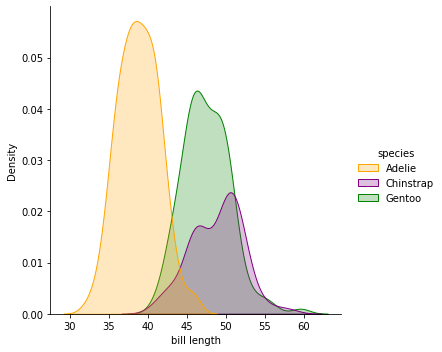

In [ ]:
sns.displot(data=df, x='bill length', hue='species', palette=palette, kind='kde', fill=True)

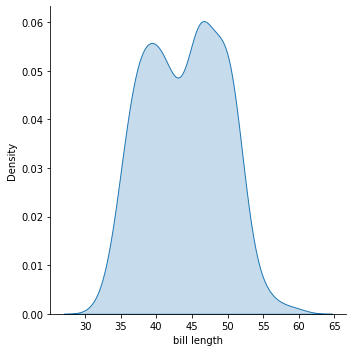

In [ ]:
sns.displot(data=df, x='bill length', kind='kde', fill=True)

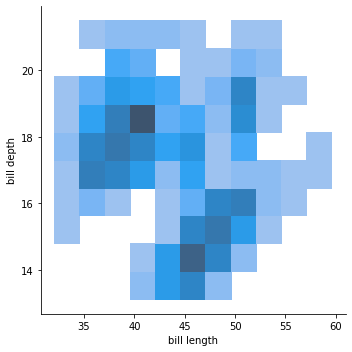

In [ ]:
sns.displot(data=df, x='bill length', y='bill depth')

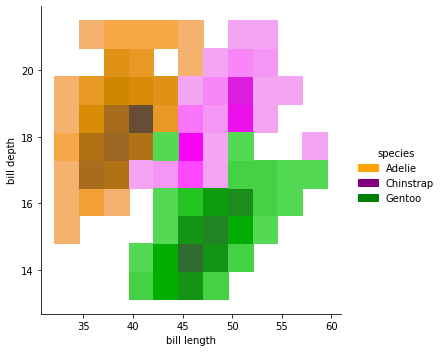

In [ ]:
sns.displot(data=df, x='bill length', y='bill depth', hue='species', palette=palette)

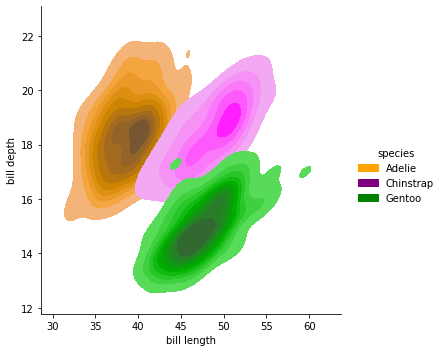

In [ ]:
sns.displot(data=df, x='bill length', y='bill depth', hue='species', palette=palette, kind='kde', fill=True)

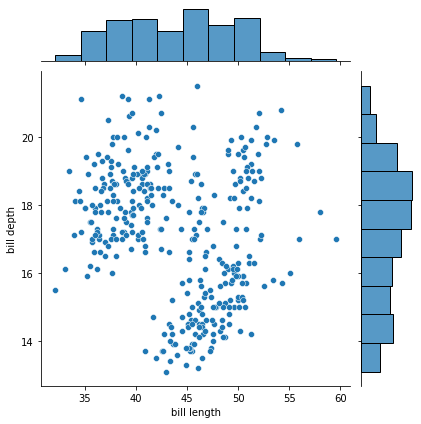

In [ ]:
sns.jointplot(data=df, x='bill length', y='bill depth')

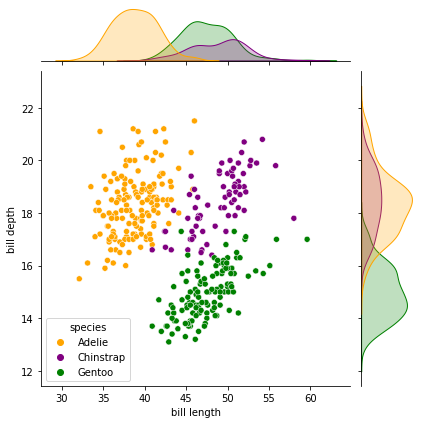

In [ ]:
sns.jointplot(data=df, x='bill length', y='bill depth', hue='species', palette=palette)

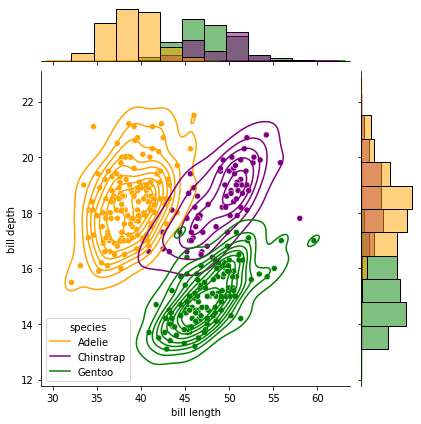

In [ ]:
g = sns.jointplot(data=df, x='bill length', y='bill depth', hue='species', palette=palette)
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

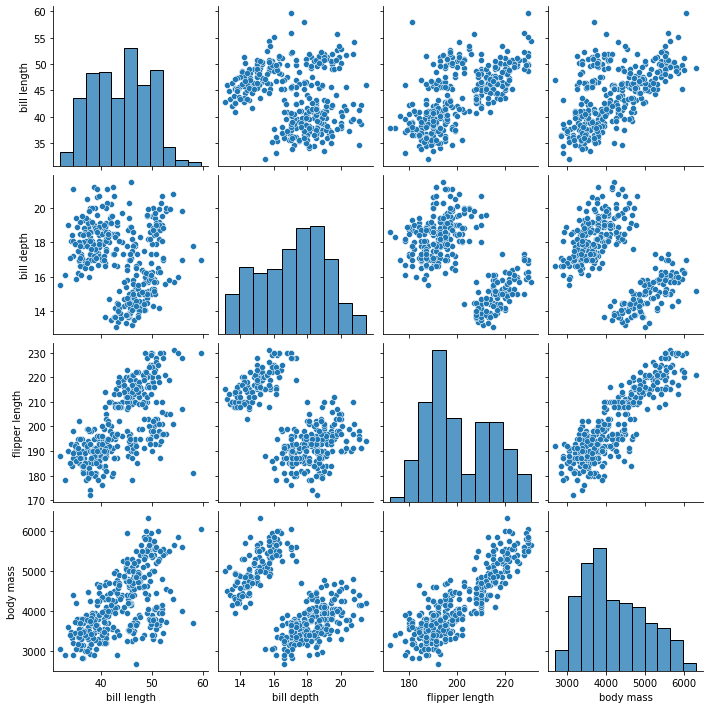

In [ ]:
sns.pairplot(data=df, vars=df.columns[2:6])

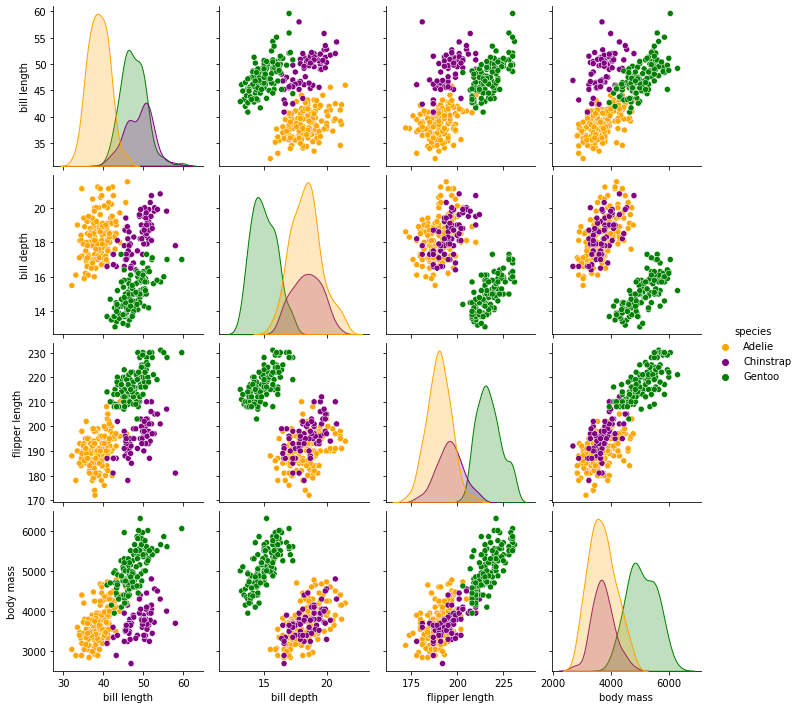

In [ ]:
sns.pairplot(data=df, vars=df.columns[2:6], hue='species', palette=palette)

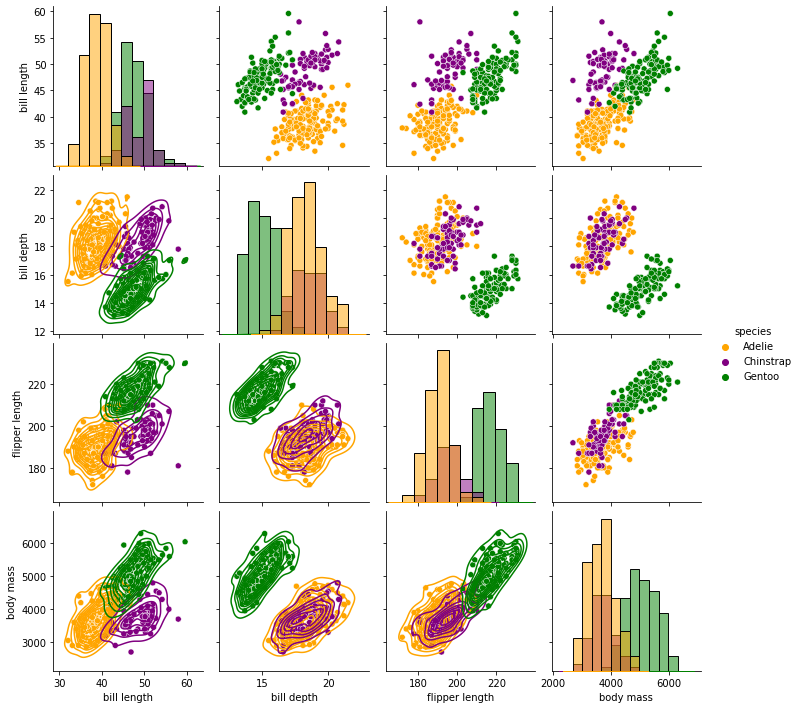

In [ ]:
g = sns.pairplot(data=df, vars=df.columns[2:6], hue='species', palette=palette)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)

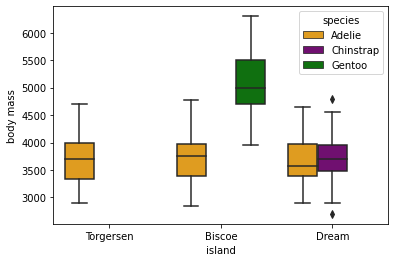

In [ ]:
g = sns.boxplot(x = 'island', y ='body mass', hue = 'species', data = df, palette=palette)

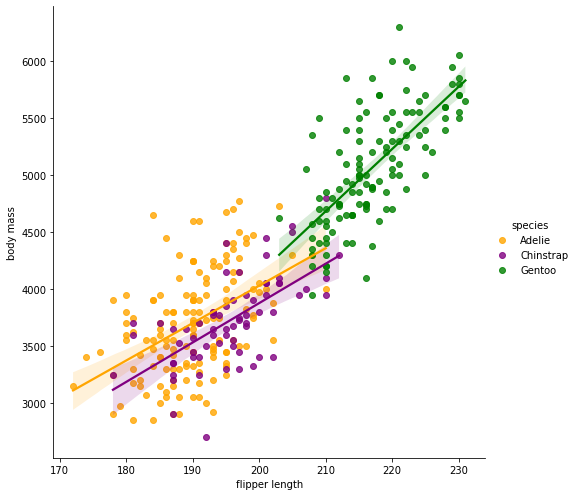

In [ ]:
g = sns.lmplot(x = 'flipper length', y ='body mass', hue = 'species',height=7, data = df, palette=palette)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from graphviz import Source
from sklearn.tree import export_graphviz

In [4]:
from graphviz import Source
from sklearn.tree import export_graphviz

In [5]:
df = pd.DataFrame(data=penguins)

In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df=pd.get_dummies(df, columns = ["species"], prefix = ["species"])
df=pd.get_dummies(df, columns = ["island"], prefix = ["island"])
df=pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])

In [9]:
del df["island_Dream"]
del df["sex_Male"]

In [10]:
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Torgersen,sex_Female
0,39.1,18.7,181.0,3750.0,1,0,0,0,1,0
1,39.5,17.4,186.0,3800.0,1,0,0,0,1,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,1,1
4,36.7,19.3,193.0,3450.0,1,0,0,0,1,1
5,39.3,20.6,190.0,3650.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,1
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,1
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,1


In [11]:
y = df[df.columns[4:7]]
X = df.drop(df[df.columns[4:7]], axis = 1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

In [14]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9761904761904762

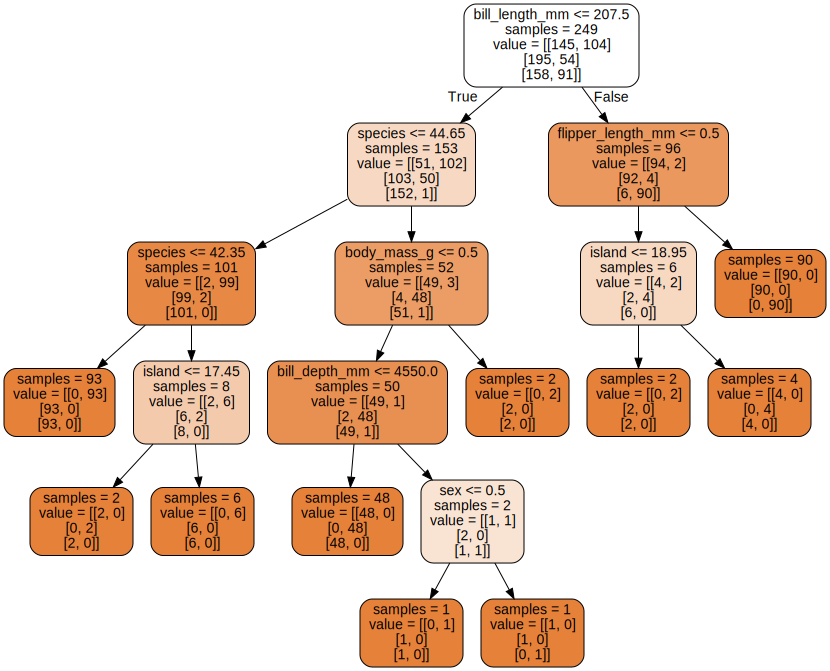

In [15]:
export_graphviz(model, out_file='penguins.dot', feature_names=penguins.columns, class_names=penguins.species, impurity=False, filled=True, rounded=True)
Source.from_file('penguins.dot')

In [ ]:
model = DecisionTreeClassifier(max_depth=1,random_state=0).fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8214285714285714

In [ ]:
model = DecisionTreeClassifier(max_depth=2,random_state=0).fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9404761904761905

In [ ]:
model = DecisionTreeClassifier(max_depth=3,random_state=0).fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9404761904761905

In [ ]:
model = DecisionTreeClassifier(max_depth=4,random_state=0).fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9642857142857143

In [ ]:
model = DecisionTreeClassifier(max_depth=5,random_state=0).fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9761904761904762

In [ ]:
model = DecisionTreeClassifier(max_depth=6,random_state=0).fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9761904761904762

In [17]:
# => hyperparameter max_depth càng lớn thì độ chính xác càng lớn 